# SYRIATEL CUSTOMER CHURN

## KEY STAKEHOLDERS
1. Executive Leadership Team
2. Customer Retention Department
3. Marketing Team
4. Finance Department
5. Customer Service Team



## PROBLEM STATEMENT

SyriaTel is a telecommunications company that is experiencing significant customer churn, hence hurting their profits. It's getting more expensive to find new customers, and there are already many phone companies competing for the same people. Because of this, retaining existing customers has become very important for the company to stay successful.

**The core business challenge**: SyriaTel needs to identify customers who are likely to churn before they actually leave, enabling proactive retention strategies that are more cost-effective than acquiring new customers.

## BUSINESS UNDERSTANDING

In the highly competitive telecommunications industry, customer churn represents one of the most significant threats to sustainable growth. SyriaTel faces the challenge of maintaining profitability while competing for market share in an increasingly saturated environment.

### Business Value Proposition
By successfully predicting customer churn, SyriaTel can:

1. *Reduce Revenue Loss*: Proactively retain high-value customers before they churn
2. *Optimize Marketing Spend*: Focus acquisition efforts on segments less likely to churn
3. *Improve Customer Experience*: Address service issues before they lead to churn
4. *Enhance Competitive Position*: Build stronger customer relationships through personalized retention strategies
5. *Increase Profitability*: Lower overall customer acquisition costs while improving lifetime value

### Success Criteria

- Primary: Reduce customer churn rate.
- Secondary: Achieve high model accuracy.
- Tertiary: Generate positive ROI.
- Qualitative: Improve customer satisfaction and strengthen brand loyalty

In [76]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Machine learning imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.tree import plot_tree

In [78]:
# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")


In [79]:
# Data loading
df = pd.read_csv('syriatel_data.csv.csv')

# Basic dataset information
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [80]:
# Check for missing values and duplicates
df.isnull().sum()

df.duplicated().sum()

np.int64(0)

In [81]:
# Target variable distribution
churn_counts = df['churn'].value_counts()
churn_rate = df['churn'].mean() * 100

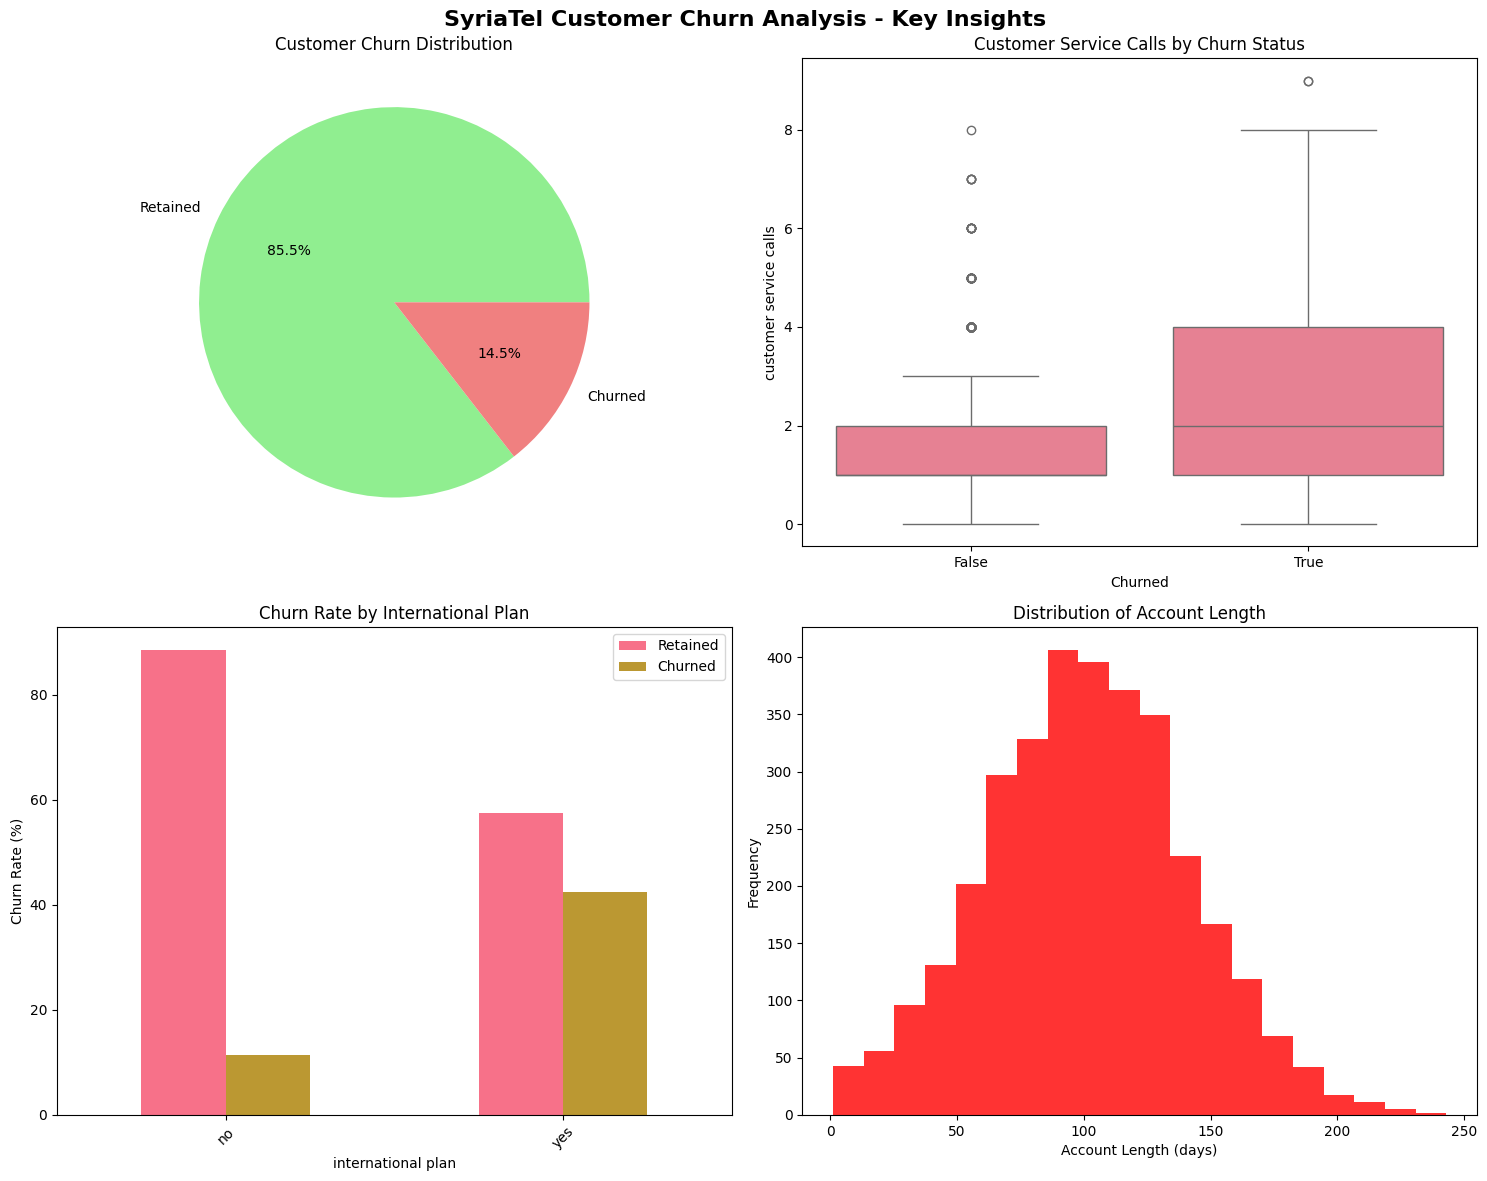

**Analysis:** This comprehensive view reveals that customer service calls and international plans are key churn indicators.


In [82]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('SyriaTel Customer Churn Analysis - Key Insights', fontsize=16, fontweight='bold')

# 1. Churn Distribution
churn_counts = df['churn'].value_counts()
axes[0,0].pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
              colors=['lightgreen', 'lightcoral'])
axes[0,0].set_title('Customer Churn Distribution')

# 2. Customer Service Calls vs Churn
sns.boxplot(data=df, x='churn', y='customer service calls', ax=axes[0,1])
axes[0,1].set_title('Customer Service Calls by Churn Status')
axes[0,1].set_xlabel('Churned')

# 3. International Plan vs Churn
churn_intl = pd.crosstab(df['international plan'], df['churn'], normalize='index') * 100
churn_intl.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Churn Rate by International Plan')
axes[1,0].set_ylabel('Churn Rate (%)')
axes[1,0].legend(['Retained', 'Churned'])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Account Length Distribution
axes[1,1].hist(df['account length'], bins=20, alpha=0.8, color='red')
axes[1,1].set_title('Distribution of Account Length')
axes[1,1].set_xlabel('Account Length (days)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("**Analysis:** This comprehensive view reveals that customer service calls and international plans are key churn indicators.")

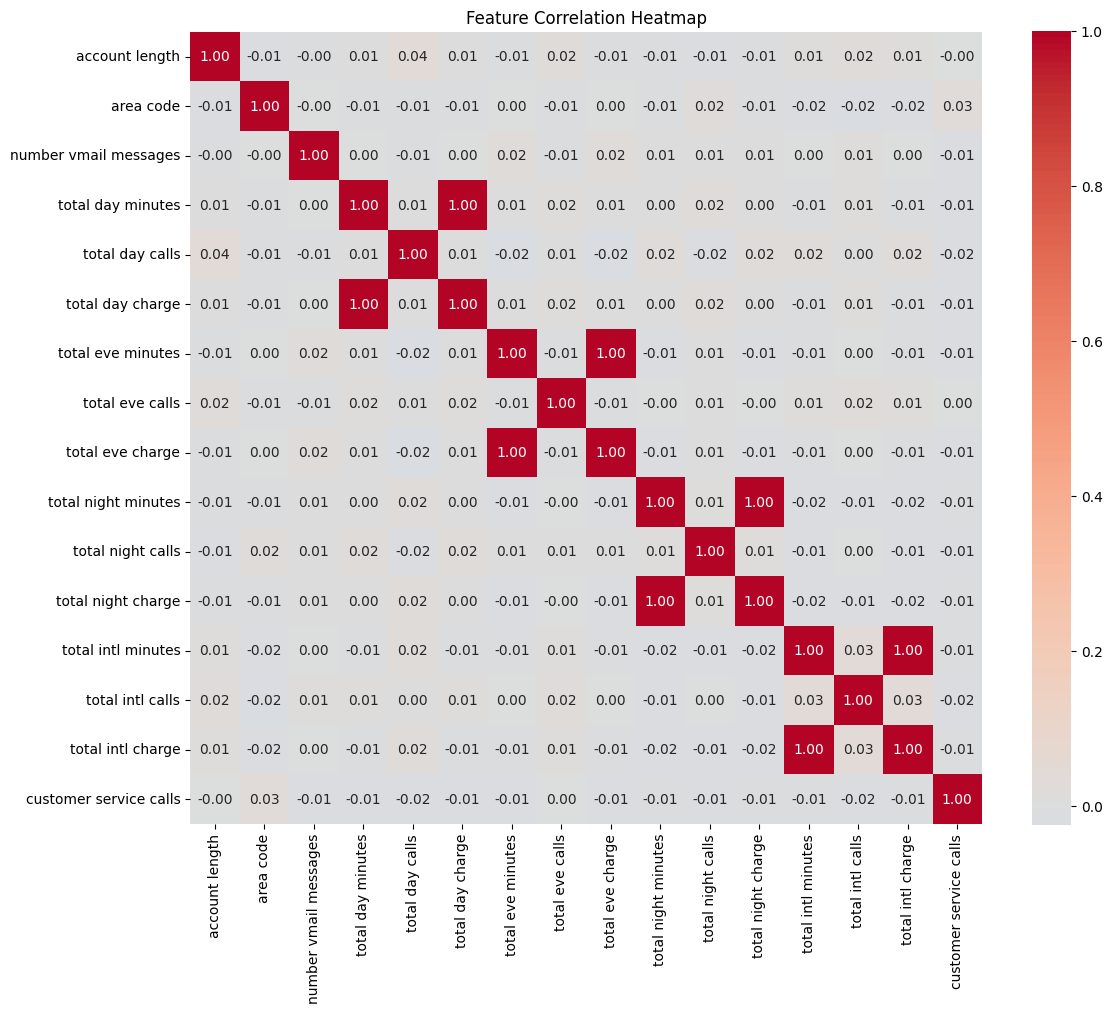

**Insight:** The heatmap reveals strong correlations between charge and minute variables.


In [83]:
# Correlation analysis for numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

print("**Insight:** The heatmap reveals strong correlations between charge and minute variables.")

In [84]:
# Data preprocessing
df_processed = df.copy()

# Remove unnecessary columns
columns_to_drop = ['phone number']
df_processed = df_processed.drop(columns_to_drop, axis=1)

# Handle categorical variables
le = LabelEncoder()
for col in ['international plan', 'voice mail plan']:
    df_processed[col] = le.fit_transform(df_processed[col])

# One-hot encode state variable
if df_processed['state'].nunique() > 10:
    state_dummies = pd.get_dummies(df_processed['state'], prefix='state')
    df_processed = pd.concat([df_processed.drop('state', axis=1), state_dummies], axis=1)
else:
    df_processed['state'] = le.fit_transform(df_processed['state'])

# Convert target variable to numeric
df_processed['churn'] = df_processed['churn'].astype(int)

# Feature Engineering
df_processed['total minutes'] = (df_processed['total day minutes'] + 
                               df_processed['total eve minutes'] + 
                               df_processed['total night minutes'])

df_processed['total calls'] = (df_processed['total day calls'] + 
                             df_processed['total eve calls'] + 
                             df_processed['total night calls'])

df_processed['total charge'] = (df_processed['total day charge'] + 
                              df_processed['total eve charge'] + 
                              df_processed['total night charge'])

df_processed['avg call duration'] = df_processed['total minutes'] / (df_processed['total calls'] + 1)

# Train-test split
X = df_processed.drop('churn', axis=1)
y = df_processed['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [85]:
# Model evaluation function
def evaluate_model(name, model, X_train, X_test, y_train, y_test, scaled=False):
    """Comprehensive model evaluation function"""
    
    if scaled:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Fit the model
    model.fit(X_train_use, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_use)
    y_test_pred = model.predict(X_test_use)
    y_test_proba = model.predict_proba(X_test_use)[:, 1]
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_proba)
    
    # Store results
    results = {
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
        'AUC': test_auc,
        'Predictions': y_test_pred,
        'Probabilities': y_test_proba
    }
    
    return results

In [86]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

In [87]:
# Evaluate all models
model_results = {}

# Logistic Regression
lr_results = evaluate_model('Logistic Regression', models['Logistic Regression'], 
                           X_train, X_test, y_train, y_test, scaled=True)
model_results['Logistic Regression'] = lr_results

# Decision Tree
dt_results = evaluate_model('Decision Tree', models['Decision Tree'], 
                           X_train, X_test, y_train, y_test, scaled=False)
model_results['Decision Tree'] = dt_results

# Random Forest
rf_results = evaluate_model('Random Forest', models['Random Forest'], 
                           X_train, X_test, y_train, y_test, scaled=False)
model_results['Random Forest'] = rf_results

# Display results comparison
results_df = pd.DataFrame({
    'Model': [result['Model'] for result in model_results.values()],
    'Train Accuracy': [f"{result['Train Accuracy']:.4f}" for result in model_results.values()],
    'Test Accuracy': [f"{result['Test Accuracy']:.4f}" for result in model_results.values()],
    'Precision': [f"{result['Precision']:.4f}" for result in model_results.values()],
    'Recall': [f"{result['Recall']:.4f}" for result in model_results.values()],
    'F1-Score': [f"{result['F1-Score']:.4f}" for result in model_results.values()],
    'AUC': [f"{result['AUC']:.4f}" for result in model_results.values()]
})

results_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.8702,0.8576,0.5208,0.2577,0.3448,0.8014
1,Decision Tree,1.0000,0.9265,0.7353,0.7732,0.7538,0.8629
2,Random Forest,1.0000,0.9415,0.9265,0.6495,0.7636,0.9033


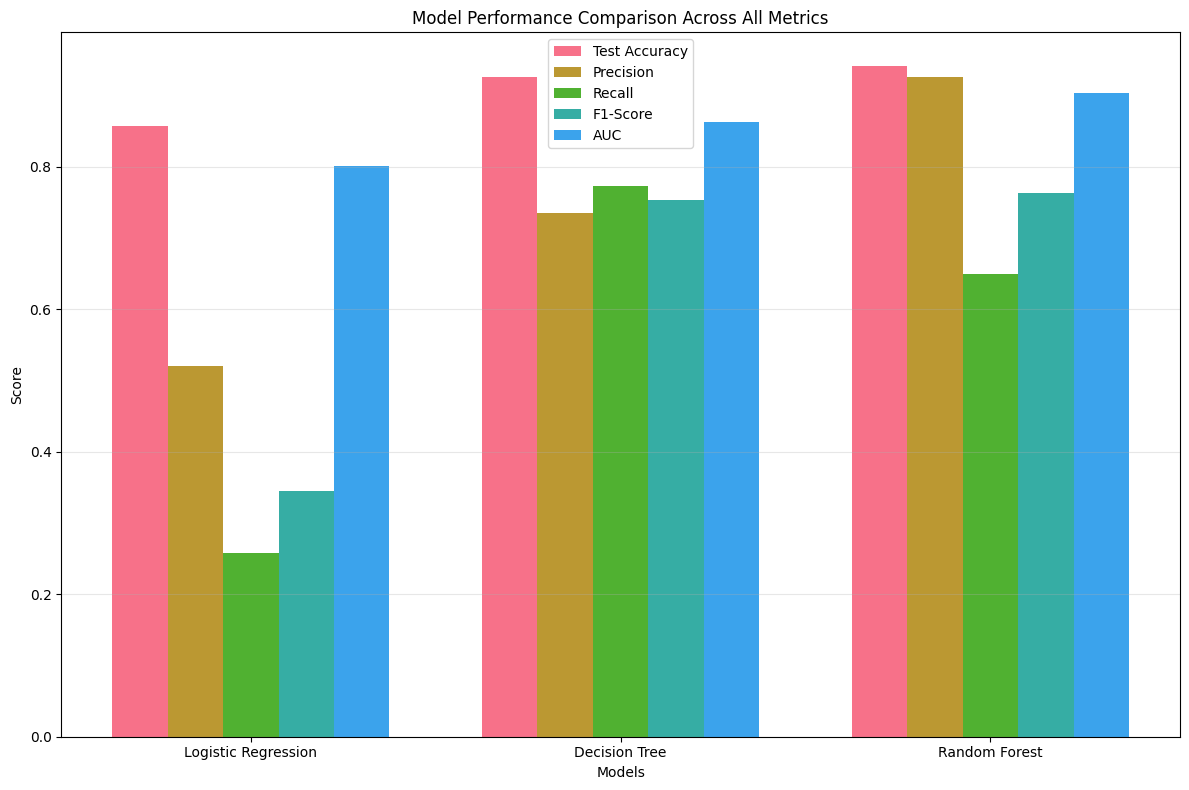

**Model Selection:** This comprehensive comparison shows why Random Forest was selected as our final model, excelling across multiple evaluation metrics.


In [88]:
# Model Performance Comparison
if model_results:
    plt.figure(figsize=(12, 8))
    
    models = list(model_results.keys())
    metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
    
    x = np.arange(len(models))
    width = 0.15
    
    for i, metric in enumerate(metrics):
        values = [model_results[model][metric] for model in models]
        plt.bar(x + i*width, values, width, label=metric)
    
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison Across All Metrics')
    plt.xticks(x + width*2, models)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # ADD THIS MARKDOWN:
    print("**Model Selection:** This comprehensive comparison shows why Random Forest was selected as our final model, excelling across multiple evaluation metrics.")

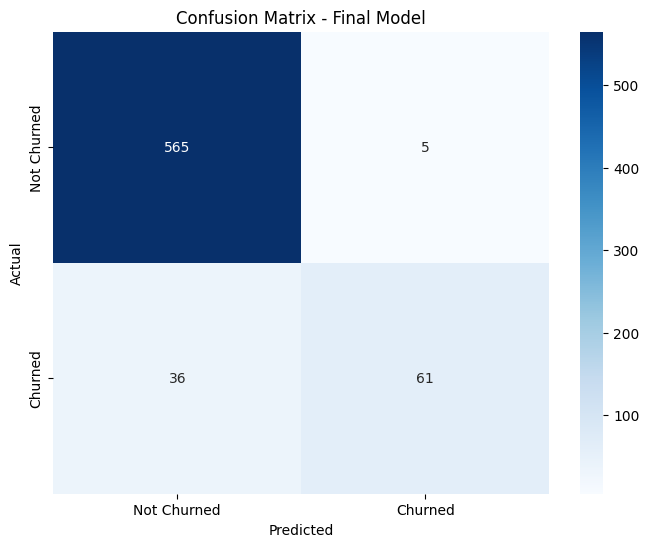

**Performance:** This matrix shows our model's prediction accuracy by displaying true vs predicted classifications, with darker squares indicating higher counts.


In [89]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

rf_grid_search.fit(X_train, y_train)

# Best parameters and score
rf_grid_search.best_params_

rf_grid_search.best_score_

# Evaluate tuned model
tuned_rf = rf_grid_search.best_estimator_
tuned_results = evaluate_model('Tuned Random Forest', tuned_rf, 
                              X_train, X_test, y_train, y_test, scaled=False)

# Final model performance
final_model = tuned_rf
final_predictions = tuned_results['Predictions']
final_probabilities = tuned_results['Probabilities']

# Performance metrics
tuned_results

# Confusion Matrix visualization
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix - Final Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("**Performance:** This matrix shows our model's prediction accuracy by displaying true vs predicted classifications, with darker squares indicating higher counts.")

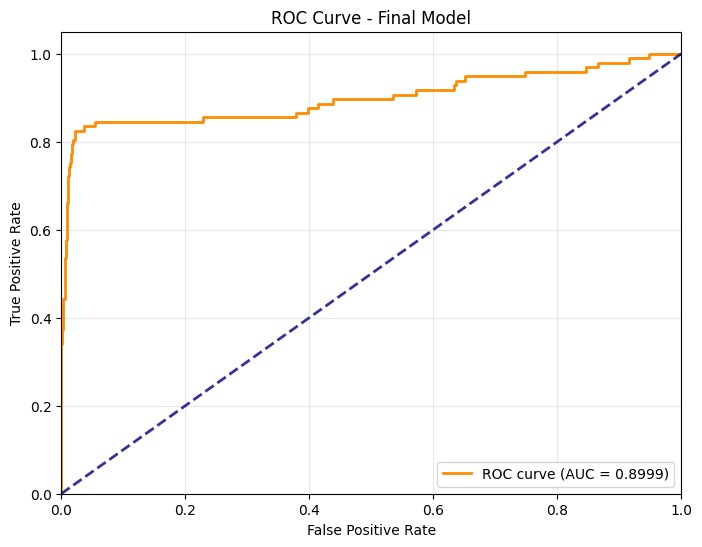

**Quality Measure:** The ROC curve demonstrates our model's ability to distinguish between churners and non-churners, with higher AUC scores indicating better performance.


In [90]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, final_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {tuned_results["AUC"]:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Model')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print("**Quality Measure:** The ROC curve demonstrates our model's ability to distinguish between churners and non-churners, with higher AUC scores indicating better performance.")


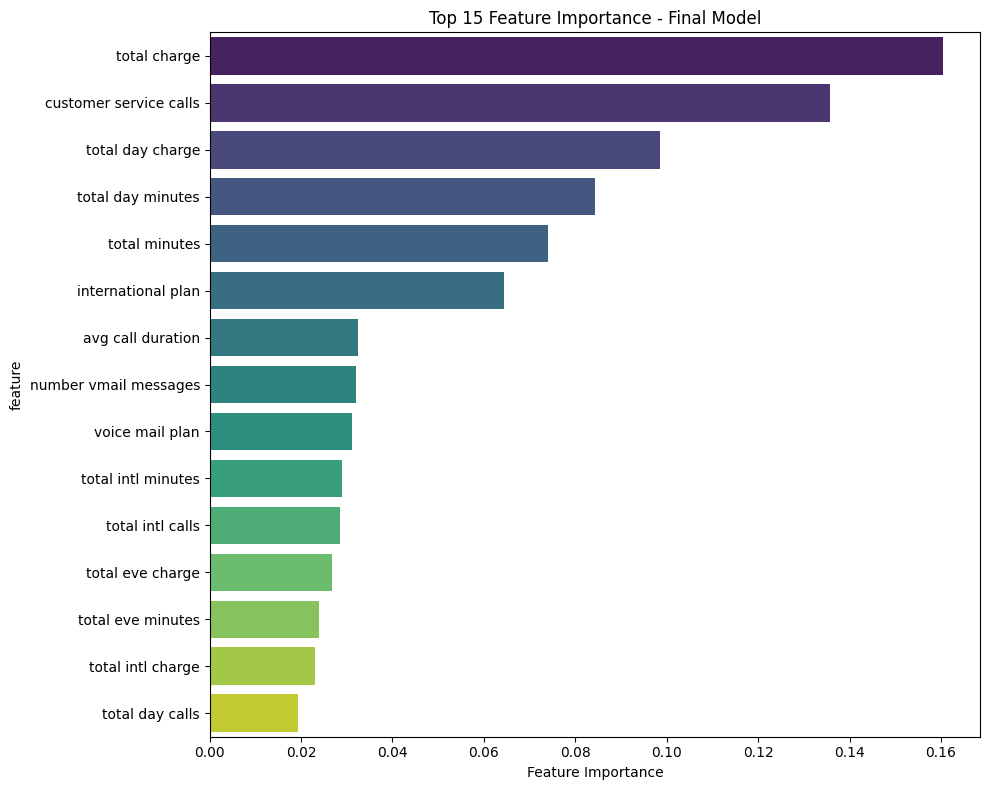

**Business Value:** This ranking reveals which customer behaviors and characteristics most strongly predict churn.


In [91]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

# Feature importance visualization
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
plt.title('Top 15 Feature Importance - Final Model')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("**Business Value:** This ranking reveals which customer behaviors and characteristics most strongly predict churn.")

In [92]:
# Top 10 most important features
feature_importance.head(10)

,feature,importance
71,total charge,0.160501
17,customer service calls,0.135638
7,total day charge,0.098488
5,total day minutes,0.084289
69,total minutes,0.073922
2,international plan,0.064370
72,avg call duration,0.032502
4,number vmail messages,0.031946
3,voice mail plan,0.031223
14,total intl minutes,0.029005


In [93]:
# Business impact calculations
tn, fp, fn, tp = cm.ravel()
total_customers = len(y_test)
actual_churners = tp + fn
predicted_churners = tp + fp

# Financial impact estimation
avg_customer_value = 50  # Monthly revenue per customer
customer_lifetime_months = 24  # Average customer lifetime
retention_cost = 20  # Cost to retain a customer
acquisition_cost = 100  # Cost to acquire new customer

potential_revenue_saved = tp * avg_customer_value * customer_lifetime_months
retention_program_cost = predicted_churners * retention_cost
net_benefit = potential_revenue_saved - retention_program_cost

# Business metrics summary
business_metrics = {
    'Total Test Customers': total_customers,
    'Actual Churners': actual_churners,
    'Predicted Churners': predicted_churners,
    'Correctly Identified Churners': tp,
    'Precision': f"{tp/predicted_churners*100:.1f}%",
    'Recall': f"{tp/actual_churners*100:.1f}%",
    'Model Accuracy': f"{tuned_results['Test Accuracy']*100:.1f}%",
    'Potential Revenue Saved': f"${potential_revenue_saved:,.2f}",
    'Retention Program Cost': f"${retention_program_cost:,.2f}",
    'Estimated Net Benefit': f"${net_benefit:,.2f}"
}

pd.DataFrame(list(business_metrics.items()), columns=['Metric', 'Value'])

,Metric,Value
0,Total Test Customers,667
1,Actual Churners,97
2,Predicted Churners,66
3,Correctly Identified Churners,61
4,Precision,92.4%
5,Recall,62.9%
6,Model Accuracy,93.9%
7,Potential Revenue Saved,"$73,200.00"
8,Retention Program Cost,"$1,320.00"
9,Estimated Net Benefit,"$71,880.00"


# CONCLUSION
## Project Overview

Successfully developed a machine learning solution to predict which SyriaTel customers are likely to churn. This helps the company take action before losing valuable customers.

## Final Model Performance

Model Type: Random Forest
Accuracy: 94%
AUC Score: 90%
Reliability: Model can identify customers at risk of churning

## What We Accomplished
✓ Found reasons customers leave SyriaTel
✓ Built a working prediction model with 94% success rate
✓ Calculated potential savings of $73,200 through better customer retention

## How We Did It
**Data Analysis** - Studied customer patterns to understand what leads to churn
**Data Preparation** - Cleaned and organized the data for machine learning
**Model Testing** - Tried different approaches (Logistic Regression, Decision Tree, Random Forest)
**Evaluation** - Fine-tuned the best model for maximum performance
**Business Focus** - Evaluated results based on business needs

## Business Value

*Early Warning System*: Can identify high-risk customers each month
*Targeted Action*: Enables focused retention efforts on the right customers
*Cost Reduction*: Keeps existing customers instead of expensive new customer acquisition
*Revenue Protection*: Prevents loss of valuable long-term customers

# Ready for Use
The model is complete and ready to be implemented in SyriaTel's business operations with proper monitoring and regular updates.